# VegaLite.jl examples

In [1]:
using VegaDatasets, VegaLite

## Layered & Multi-View Displays

### Error Bars & Error Bands

#### Error Bars showing Confidence Interval

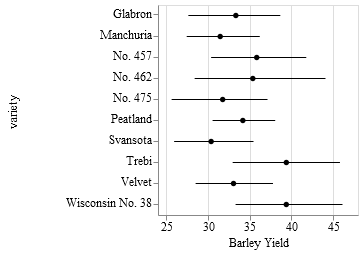

In [2]:
dataset("barley") |> vl"""
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "layer": [{
    "mark": {"type": "point", "filled": true},
    "encoding": {
      "x": {
        "aggregate": "mean", "field": "yield", "type": "quantitative",
        "scale": {"zero": false},
        "axis": {"title": "Barley Yield"}
      },
      "y": {
        "field": "variety", "type": "ordinal"
      },
      "color": {"value": "black"}
    }
  }, {
    "mark": "rule",
    "encoding": {
      "x": {
        "aggregate": "ci0", "field": "yield", "type": "quantitative"
      },
      "x2": {
        "aggregate": "ci1", "field": "yield", "type": "quantitative"
      },
      "y": {
        "field": "variety", "type": "ordinal"
      }
    }
  }]
}
"""

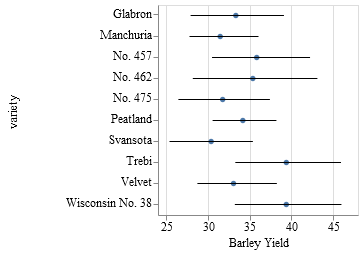

In [3]:
dataset("barley") |> @vlplot() +
@vlplot(mark={:point,filled=true},enc={x={"mean(yield):q",scale={zero=false},axis={title="Barley Yield"}},y={"variety:o",color={value=:black}}}) +
@vlplot(:rule, enc={x="ci0(yield):q",x2="ci1(yield):q",y="variety:o"})

#### Error Bars showing Standard Deviation

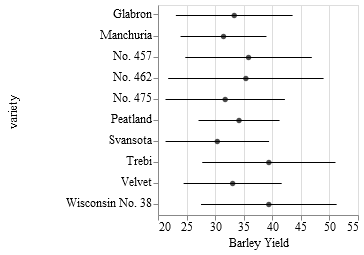

In [4]:
dataset("barley") |> vl"""
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "transform": [
    {
      "aggregate": [
        {"op": "mean", "field": "yield", "as": "mean"},
        {"op": "stdev", "field": "yield", "as": "stdev"}
      ],
      "groupby": ["variety"]
    },
    {
      "calculate": "datum.mean-datum.stdev",
      "as": "lower"
    },
    {
      "calculate": "datum.mean+datum.stdev",
      "as": "upper"
    }
  ],
  "layer": [{
    "mark": {"type": "point", "filled": true},
    "encoding": {
      "x": {
        "field": "mean", "type": "quantitative",
        "scale": {"zero": false},
        "axis": {"title": "Barley Yield"}
      },
      "y": {"field": "variety", "type": "ordinal"},
      "color": {"value": "black"}
    }
  }, {
    "mark": "rule",
    "encoding": {
      "x": {"field": "upper", "type": "quantitative"},
      "x2": {"field": "lower", "type": "quantitative"},
      "y": {"field": "variety", "type": "ordinal"}
    }
  }]
}
"""

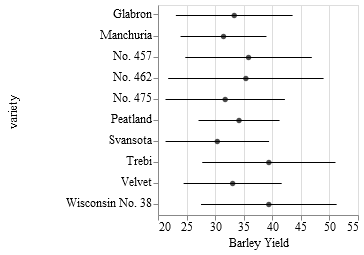

In [5]:
dataset("barley") |> @vlplot(
    transform=[
        {
            aggregate=[{op=:mean,field=:yield,as=:mean},{op=:stdev,field=:yield,as=:stdev}],
            groupby=[:variety]
        },
        {calculate="datum.mean-datum.stdev", as=:lower},
        {calculate="datum.mean+datum.stdev", as=:upper}
    ]
) +
@vlplot(mark={:point,filled=true},enc={x={"mean:q",scale={zero=false},axis={title="Barley Yield"}},y="variety:o",color={value=:black}}) +
@vlplot(:rule,enc={x="upper:q",x2="lower:q",y="variety:o"})

#### Line Chart with Confidence Interval Band

WARN A time scale is used with area mark. This can be misleading as the width of the area can be arbitrary based on the scale domain. You may want to use point mark instead.
WARN A time scale is used with area mark. This can be misleading as the width of the area can be arbitrary based on the scale domain. You may want to use point mark instead.


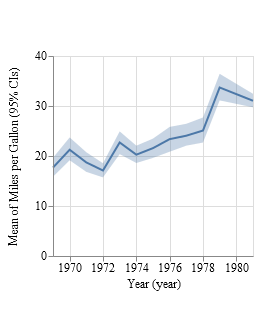

In [6]:
dataset("cars") |> vl"""
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "layer": [
    {
      "mark": "area",
      "encoding": {
        "x": {
          "field": "Year",
          "type": "temporal",
          "timeUnit": "year"
        },
        "y": {
          "aggregate": "ci0",
          "field": "Miles_per_Gallon",
          "type": "quantitative",
          "axis": {"title": "Mean of Miles per Gallon (95% CIs)"}
        },
        "y2": {
          "aggregate": "ci1",
          "field": "Miles_per_Gallon",
          "type": "quantitative"
        },
        "opacity": {"value": 0.3}
      }
    },
    {
      "mark": "line",
      "encoding": {
        "x": {
          "field": "Year",
          "type": "temporal",
          "timeUnit": "year"
        },
        "y": {
          "aggregate": "mean",
          "field": "Miles_per_Gallon",
          "type": "quantitative"
        }
      }
    }
  ]
}
"""

WARN A time scale is used with area mark. This can be misleading as the width of the area can be arbitrary based on the scale domain. You may want to use point mark instead.
WARN A time scale is used with area mark. This can be misleading as the width of the area can be arbitrary based on the scale domain. You may want to use point mark instead.


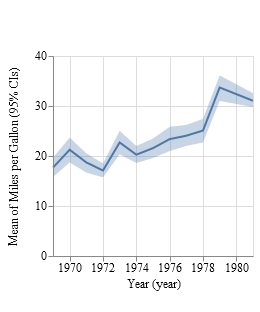

In [7]:
dataset("cars") |> @vlplot() +
@vlplot(:area, enc={x={"Year:t",timeUnit=:year},y={"ci0(Miles_per_Gallon):q",axis={title="Mean of Miles per Gallon (95% CIs)"}},y2="ci1(Miles_per_Gallon):q",opacity={value=0.3}}) +
@vlplot(:line,enc={x={"Year:t",timeUnit=:year},y="mean(Miles_per_Gallon):q"})

#### Scatterplot with Mean and Standard Deviation Overlay

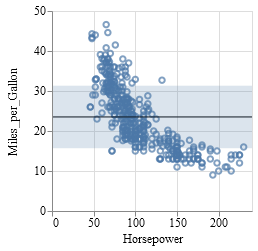

In [8]:
dataset("cars") |> vl"""
{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.json",
  "description": "A scatterplot showing horsepower and miles per gallons for various cars.",
  "layer": [{
    "mark": "point",
    "encoding": {
      "x": {"field": "Horsepower","type": "quantitative"},
      "y": {"field": "Miles_per_Gallon","type": "quantitative"}
    }
  },{
    "transform": [
      {
        "aggregate": [
          {"op": "mean", "field": "Miles_per_Gallon", "as": "mean_MPG"},
          {"op": "stdev", "field": "Miles_per_Gallon", "as": "dev_MPG"}
        ],
        "groupby": []
      },
      {
        "calculate": "datum.mean_MPG-datum.dev_MPG",
        "as": "lower"
      },
      {
        "calculate": "datum.mean_MPG+datum.dev_MPG",
        "as": "upper"
      }
    ],
    "layer": [{
      "mark": "rule",
      "encoding": {
        "y": {"field": "mean_MPG","type": "quantitative", "axis": null}
      }
    },{
      "mark": "rect",
      "encoding": {
        "y": {"field": "lower","type": "quantitative",
          "axis": null},
        "y2": {"field": "upper","type": "quantitative"},
        "opacity": {"value": 0.2}
      }
    }]
  }]
}
"""

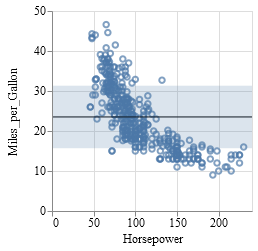

In [9]:
dataset("cars") |> @vlplot() +
@vlplot(:point,enc={x="Horsepower:q",y="Miles_per_Gallon:q"}) +
(
    @vlplot(
        transform=[
            {aggregate=[
                {op=:mean,field=:Miles_per_Gallon,as=:mean_MPG},
                {op=:stdev,field=:Miles_per_Gallon,as=:dev_MPG}
                ],
                groupby=[]
            },
            {calculate="datum.mean_MPG - datum.dev_MPG", as=:lower},
            {calculate="datum.mean_MPG + datum.dev_MPG", as=:upper}
        ]) +
    @vlplot(:rule,enc={y={"mean_MPG:q",axis=nothing}}) +
    @vlplot(:rect,enc={y={"lower:q",axis=nothing},y2="upper:q",opacity={value=0.2}})
)